# Softmax Classifier

This exercise guides you through the process of classifying images using a Softmax classifier. As part of this you will:

- Implement a fully vectorized loss function for the Softmax classifier
- Calculate the analytical gradient using vectorized code
- Tune hyperparameters on a validation set
- Optimize the loss function with Stochastic Gradient Descent (SGD)
- Visualize the learned weights

In [6]:
# start-up code! 
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from load_cifar10_tvt import load_cifar10_train_val
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_train_val()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)    
print('Val data shape: ', X_val.shape)
print('Val labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train, validation and testing sets have been created as 
 X_i and y_i where i=train,val,test
Train data shape:  (3073, 49000)
Train labels shape:  (49000,)
Val data shape:  (3073, 1000)
Val labels shape:  (1000,)
Test data shape:  (3073, 1000)
Test labels shape:  (1000,)


Code for this section is to be written in `f17cs7643/classifiers/softmax.py`

In [43]:
# Now, implement the vectorized version in softmax_loss_vectorized.

import time
from f17cs7643.classifiers.softmax import softmax_loss_vectorized

W = np.random.randn(10, 3073) * 0.0001

tic = time.time()
loss_vectorized, grad = softmax_loss_vectorized(W, X_train, y_train, 0.00001)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss_vectorized)
print('sanity check: %f' % (-np.log(0.1)))

# gradient check. 
from f17cs7643.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_vectorized(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

vectorized loss: 2.359487e+00 computed in 0.244607s
loss: 2.359487
sanity check: 2.302585
numerical: -2.461617 analytic: -2.461617, relative error: 5.918240e-09
numerical: 1.079001 analytic: 1.079001, relative error: 1.552960e-08
numerical: -4.233097 analytic: -4.233097, relative error: 5.068654e-09
numerical: 5.957924 analytic: 5.957924, relative error: 1.639723e-08
numerical: 3.069543 analytic: 3.069543, relative error: 2.730427e-08
numerical: 0.028835 analytic: 0.028835, relative error: 1.548882e-06
numerical: -0.069263 analytic: -0.069263, relative error: 5.846807e-07
numerical: 3.315326 analytic: 3.315326, relative error: 2.316957e-08
numerical: -0.033777 analytic: -0.033777, relative error: 1.450711e-07
numerical: 0.210098 analytic: 0.210098, relative error: 3.217039e-08


float64


  3%|██▎                                                                             | 85/3000 [00:00<00:03, 845.05it/s]

iteration 0 / 3000: loss 21.474788
iteration 100 / 3000: loss 15.010686


 12%|█████████▋                                                                     | 369/3000 [00:00<00:02, 923.82it/s]

iteration 200 / 3000: loss 12.601247
iteration 300 / 3000: loss 10.328060


 19%|██████████████▋                                                                | 557/3000 [00:00<00:02, 921.69it/s]

iteration 400 / 3000: loss 8.735128
iteration 500 / 3000: loss 7.483170


 25%|███████████████████▌                                                           | 744/3000 [00:00<00:02, 925.18it/s]

iteration 600 / 3000: loss 6.317892
iteration 700 / 3000: loss 5.490284


 31%|████████████████████████▏                                                      | 919/3000 [00:01<00:02, 782.36it/s]

iteration 800 / 3000: loss 4.742823
iteration 900 / 3000: loss 4.317081


 37%|████████████████████████████▊                                                 | 1106/3000 [00:01<00:02, 854.39it/s]

iteration 1000 / 3000: loss 3.693591
iteration 1100 / 3000: loss 3.376962


 43%|█████████████████████████████████▋                                            | 1294/3000 [00:01<00:01, 891.26it/s]

iteration 1200 / 3000: loss 3.246975
iteration 1300 / 3000: loss 2.723489


 52%|████████████████████████████████████████▌                                     | 1562/3000 [00:01<00:01, 850.50it/s]

iteration 1400 / 3000: loss 2.746967
iteration 1500 / 3000: loss 2.563029


 58%|█████████████████████████████████████████████▏                                | 1740/3000 [00:02<00:01, 855.65it/s]

iteration 1600 / 3000: loss 2.407905
iteration 1700 / 3000: loss 2.236410


 64%|█████████████████████████████████████████████████▊                            | 1916/3000 [00:02<00:01, 863.94it/s]

iteration 1800 / 3000: loss 2.110848
iteration 1900 / 3000: loss 2.002430


 70%|██████████████████████████████████████████████████████▉                       | 2113/3000 [00:02<00:00, 922.42it/s]

iteration 2000 / 3000: loss 2.120699
iteration 2100 / 3000: loss 1.943854


 77%|███████████████████████████████████████████████████████████▊                  | 2302/3000 [00:02<00:00, 934.48it/s]

iteration 2200 / 3000: loss 1.983723
iteration 2300 / 3000: loss 1.869075


 87%|███████████████████████████████████████████████████████████████████▌          | 2599/3000 [00:02<00:00, 971.68it/s]

iteration 2400 / 3000: loss 1.876253
iteration 2500 / 3000: loss 1.883367


 90%|██████████████████████████████████████████████████████████████████████        | 2697/3000 [00:03<00:00, 954.63it/s]

iteration 2600 / 3000: loss 1.877574
iteration 2700 / 3000: loss 1.846889


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2893/3000 [00:03<00:00, 965.30it/s]

iteration 2800 / 3000: loss 1.803046
iteration 2900 / 3000: loss 1.697982


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:03<00:00, 890.03it/s]


Text(0, 0.5, 'Loss value')

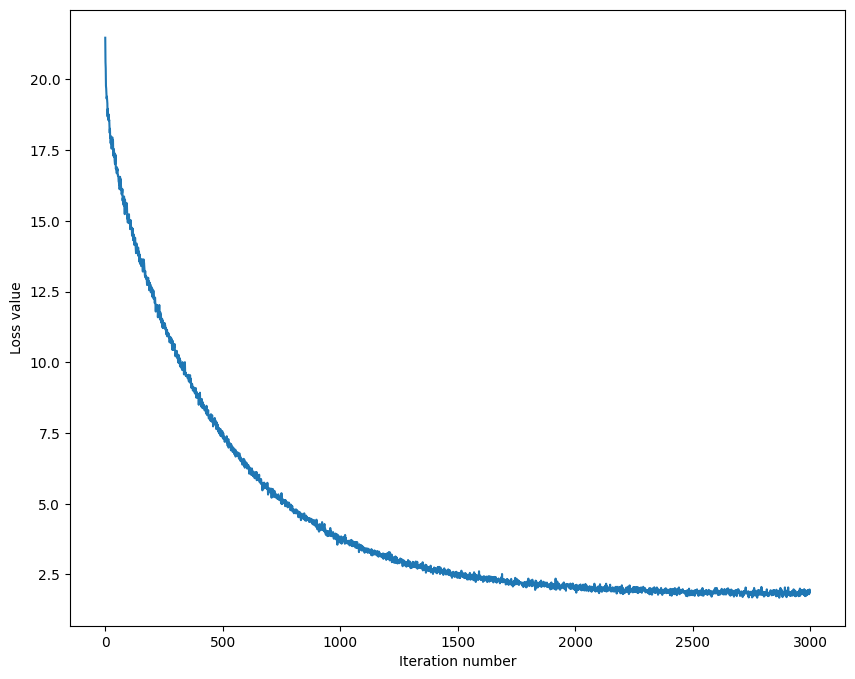

In [46]:
# Now that efficient implementations to calculate loss function and gradient of the softmax are ready,
# use it to train the classifier on the cifar-10 data
from f17cs7643.classifiers import Softmax
classifier = Softmax()
loss_hist = classifier.train(X_train, y_train, learning_rate=1e-6, reg=1000., num_iters=3000,batch_size=200, verbose=True)
# Plot loss vs. iterations
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [47]:
# Evaluate on test set
y_test_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.380000


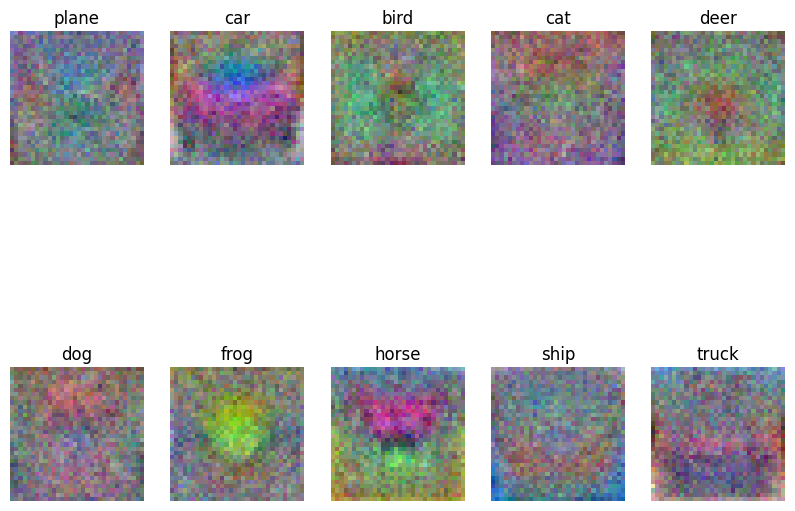

In [48]:
# Visualize the learned weights for each class
w = classifier.W[:,:-1] # strip out the bias
w = w.reshape(10, 32, 32, 3)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])